###  "In The Name Of ALLAH"
# Computational Intelligence Lab Report - Lab 3 - Mr. Amini
## Seyed Mohammadsaleh Mirzatabatabaei(smsmt@aut.ac.ir) - 9623105 
---


## Pre-Report
---


> **Supervised and unsupervised algorithm:**

In a supervised learning model, the algorithm learns on a labeled dataset, providing an answer key that the algorithm can use to evaluate its accuracy on training data. An unsupervised model, in contrast, provides unlabeled data that the algorithm tries to make sense of by extracting features and patterns on its own

> **Unsupervised machine learning algorithm:**


*   Unsupervised machine learning finds all kind of unknown patterns in data.
*   Unsupervised methods help you to find features which can be useful for categorization.
*   It is taken place in real time, so all the input data to be analyzed and labeled in the presence of learners.
*   It is easier to get unlabeled data from a computer than labeled data, which needs manual intervention.

> **Clustering:**

Clustering is an important concept when it comes to unsupervised learning. It mainly deals with finding a structure or pattern in a collection of uncategorized data. Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data. You can also modify how many clusters your algorithms should identify. It allows you to adjust the granularity of these groups.







## Report
---


### Kmeans clustering class

This code is entered in the lab class.

*   **class constructor:** takes the array as input.

*   **randInit:** takes the number of clusters (k) as input and randomly values the centers.
*   **fit:** executes the algorithm. If the category centers do not converge, the algorithm runs the initial random value algorithm again and run k-mean clustering again.
*   **newData:** returns the new vector extracted by the algorithm by inserting the center value of each batch as the elements of that batch as output.
*   **meanError:** calculates the average clusters error as the algorithm error and returns it as the output.



In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt

class Kmeans:
  def __init__(self, data):
    self.data = data
  
  def randInit(self, k):
    self.k = k
    self.centers = np.random.randint(np.min(self.data), np.max(self.data), size=(self.k))
    self.labels = np.zeros((self.data.size, 1))
    self.iters = 0
    return self

  def fit(self, max_iters = 10):
    self.iters += 1
    for counter in range(max_iters):
      if np.any(np.isnan(self.centers)):
        self.centers = np.random.randint(np.min(self.data), np.max(self.data), size=(self.k))
        self.fit()
      self.labels = np.array([np.argmin(np.abs(self.centers - x)) for x in self.data])
      center_buf = np.array([np.mean(self.data[self.labels == i]) for i in range(self.k)])
      if ~np.any(center_buf - self.centers):
        break;
      self.centers = center_buf
    return self.centers, self.iters
  
  def newData(self):
    return np.array(self.centers[self.labels])

  def meanError(self, k):
    self.randInit(k).fit()
    return np.mean(np.array([
      np.linalg.norm(self.data[self.labels == i] - self.centers[i]) 
      for i in range(self.k)
    ]))

### Gray-scale image extraction using K-mean clusteing

In this section we use the Gray-scale image matrix classification using our predefined K-mean clustering class.

To implement this algorithm, we first converted image matrix related to the Gray-scale color code (between 0-255) into a vector, and then execute the algorithm, we found the center color code in the number of clusters.

then instead of the code of each pixel, we put the color code corresponding to the handle of that pixel to reconstruct the image.

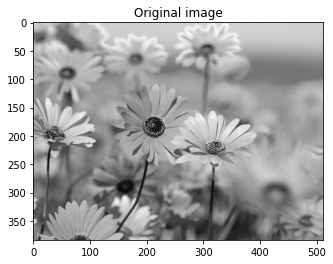

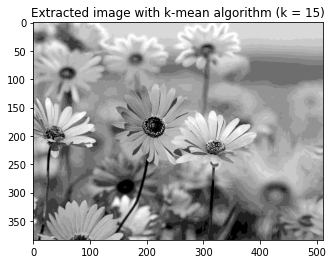


Iters of centers initialization to convergence: 1
Center colors of input data group classes:
 [210  22 201 152 171 103  86  66 160 142  45 191 131 182 118]



In [7]:
from PIL import Image

# Original image
img = np.array(Image.open(r'/content/flower.jpg').convert('L'))
img_arr = np.reshape(img, (img.shape[0] * img.shape[1],))
plt.figure();
plt.imshow(img, cmap = 'gray')
plt.title('Original image') 
plt.show()

# Extracted image
km = Kmeans(img_arr)
k = 15
centers, iters = km.randInit(k).fit(10)
new_img = np.reshape(km.newData(), img.shape).astype(int)

plt.figure();
plt.imshow(new_img, cmap = 'gray')
plt.title(f"Extracted image with k-mean algorithm (k = {k})") 
plt.show()

print(f"\nIters of centers initialization to convergence: {iters}" + 
  f"\nCenter colors of input data group classes:\n {centers.astype(int)}\n")

### Output error for each number of clusters

We want to see the results of the algorithm for clusters of 1 to 16, for this purpose we run the algorithm for each cluster and calculate the algorithm error at each stage. Finally, we have drawn an error diagram according to the number of clusters.
Algorithm output error diagram in terms of number of clusters (horizontal axis shows the number of clusters and vertical axis shows the error).

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


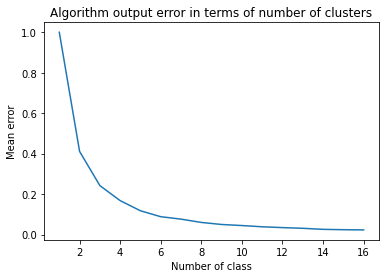

In [9]:
kmean_class_errors = np.array([km.meanError(i) for i in range(1, 17)])
kmean_class_errors = kmean_class_errors / max(kmean_class_errors)
plt.figure();
plt.plot(np.arange(1, 17),kmean_class_errors) 
plt.xlabel('Number of class') 
plt.ylabel('Mean error') 
plt.title('Algorithm output error in terms of number of clusters') 
plt.show() 

### RGB image extraction using K-mean clusteing with sklearn

In this section we use the RGB image 3D matrix classification using predefined functions of the sklearn library.

To implement this algorithm, we first converted all 3 matrices related to the blue, red and green RGB color codes into 3 vectors, and then execute the algorithm, we found the center color code in the number of clusters.

then instead of the code of each pixel, we put the color code corresponding to the handle of that pixel to reconstruct the image.

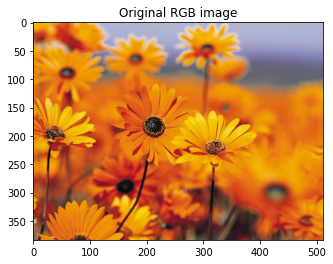

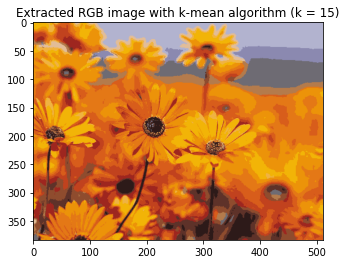


Iters to find colors: 44
Center RGB colors of input data group classes:
 [[240 179  66]
 [139 137 176]
 [193  66  30]
 [ 94  50  41]
 [228 120  22]
 [178 179 207]
 [236 147   9]
 [143  76  46]
 [242 180   7]
 [ 45  26  25]
 [110 107 115]
 [158  38  31]
 [216  93  27]
 [226 189 152]
 [180 123  76]]



In [ ]:
from sklearn.cluster import KMeans
from PIL import Image

# Original image
img = np.array(Image.open(r'/content/flower.jpg'))
img_rgb = np.reshape(img, (img.shape[0] * img.shape[1], 3))
plt.figure();
plt.imshow(img)
plt.title('Original RGB image') 
plt.show()

n_clusters = 15
kmeans = KMeans(n_clusters)
kmeans.fit(img_rgb)
extracted_colors = kmeans.cluster_centers_.astype(int)

# Extracted image
new_img = np.reshape(extracted_colors[kmeans.labels_], (img.shape[0], img.shape[1], 3))
plt.figure();
plt.imshow(new_img)
plt.title(f"Extracted RGB image with k-mean algorithm (k = {n_clusters})") 
plt.show()

print(f"\nIters to find colors: {kmeans.n_iter_}" + 
  f"\nCenter RGB colors of input data group classes:\n {extracted_colors}\n")

## Exercise
---

> **1- Optimal mode of the clustering algorithm(K-mean):**

According to the error diagram due to the number of clusters that we drew in the algorithm evaluation section of the lab report, it can be said that as the number of clusters has increased, the value of error has decreased, but from one point onwards this value is almost constant.
So the optimal state of the algorithm occurs in the lowest clusters, ie 16 clusters.

> **2- Clustering algorithm(K-mean) limitations:**

The most important limitations of Simple k-means are: The user has to specify k (the number of clusters) in the beginning. k-means can only handle numerical data. 

k-means assumes that we deal with spherical clusters and that each cluster has roughly equal numbers of observations.
In Figure 4.4 of lab work report, the relevant data report should be categorized as circular disks. (in other words each category considers the distance between the two radius of the circle)
But the k-means algorithm can only consider clusters in the area of a circle, so it will be difficult to categorize this type of data and will not categorize correctly.
So another limitation of k-means algorithm is that considers only circular clusters and does not include other shapes.







> ### 5- Data analysis of the supermarket [dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) problem:



In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Read and display data
df = pd.read_csv(r'/content/Mall_Customers.csv')
di = {"Male": 0, "Female": 1}
new_df = df.replace({"Gender": di})
data = new_df.iloc[:,3:].to_numpy()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


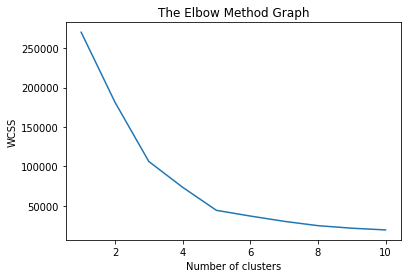

In [11]:
# The Elbow Method Graph to see error
wcss=[]
for i in range(1,11): 
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

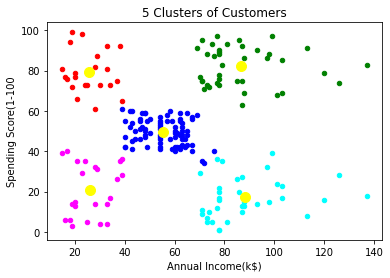

In [12]:
# K-mean Clustering
n_clusters = 5
kmeans = KMeans(n_clusters)
kmeans.fit(data)
y_kmeans = kmeans.labels_

# Visualising the clusters
plt.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], s=20, c='red', label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], s=20, c='blue', label ='Cluster 2')
plt.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], s=20, c='green', label ='Cluster 3')
plt.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 1], s=20, c='cyan', label ='Cluster 4')
plt.scatter(data[y_kmeans==4, 0], data[y_kmeans==4, 1], s=20, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title(f'{n_clusters} Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

In [13]:
# Target group
target_cluster = np.argmax(np.sum(kmeans.cluster_centers_, axis=1))
print(f"Mean of group of customers with highest Annual Income (k$) and Spending Score (1-100):\n{kmeans.cluster_centers_[target_cluster]}")
print("\nGroup of customers with highest Annual Income (k$) and Spending Score (1-100):")
df.loc[np.where(y_kmeans == target_cluster)]

Mean of group of customers with highest Annual Income (k$) and Spending Score (1-100):
[86.53846154 82.12820513]

Group of customers with highest Annual Income (k$) and Spending Score (1-100):


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93
